### Ciência dos dados [Projeto 3]: PNADC - Uso dos microdados de 2023
### Profa Orientadora: Maria Kelly Venezuela
### Grupo 8:
    - Guilherme Mitsuo Yabushita Nakama
    - Lina Furukawa Queiros
    - Lucca de Magalhães Castro Fernandes
    - Maria Clara Hirano
___

In [19]:
import os
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [20]:
pnad23_2_all = pd.read_csv('../pnad23_2.csv', sep=';')
pnad23_2_all

,Unnamed: 0,Ano,Trimestre,UF,Capital,RM_RIDE,UPA,Estrato,V1008,V1014,...,V1028191,V1028192,V1028193,V1028194,V1028195,V1028196,V1028197,V1028198,V1028199,V1028200
0,0,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
1,1,2023,2,11,11.0,NaN,110000016,1110011,1,10,...,451.548556,200.231600,239.078436,508.791587,0.000000,0.000000,515.061463,0.000000,0.0,225.178143
2,2,2023,2,11,11.0,NaN,110000016,1110011,2,10,...,217.964623,98.704681,108.979781,230.958261,0.000000,0.000000,248.378245,0.000000,0.0,111.051514
3,3,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
4,4,2023,2,11,11.0,NaN,110000016,1110011,3,10,...,452.393952,212.449131,229.969963,498.761017,0.000000,0.000000,532.511276,0.000000,0.0,229.261311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,474570,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474571,474571,2023,2,53,53.0,NaN,530060880,5310111,13,11,...,393.082569,0.000000,0.000000,416.131491,806.942713,406.701836,399.331903,408.248725,0.0,0.000000
474572,474572,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000
474573,474573,2023,2,53,53.0,NaN,530060880,5310111,14,11,...,306.219511,0.000000,0.000000,317.890988,654.353840,322.037855,306.475497,312.130129,0.0,0.000000


In [21]:
# Colunas selecionadas:
colunas = ['Ano',
           'Trimestre',
           'UF',    # Estado
           'V1022', # Situação do domicílio
           'V2007', # Sexo
           'V2009', # Idade
           'V2010', # Cor ou raça
           'VD3004', # Nível de instrução mais elevado alcançado
           'VD4002', # Condição na ocupação do trabalho principal
           'VD4007', # Posição na ocupação do trabalho principal
           'VD4020',] # Rendimento bruto mensal de todos os trabalhos

# Leitura da base de dados filtrando apenas as colunas contidas na lista 'colunas'
pnad23_2_small = pd.read_csv('../pnad23_2.csv', sep=';', usecols=colunas)

# Renomeando as colunas para facilitar a compreensão
pnad23_2_small.rename(columns={'V1022':'Area',
                               'V2007':'Sexo',
                               'V2009':'Idade',
                               'V2010':'Cor_Raca',
                               'VD3004':'Escolaridade',
                               'VD4002':'Ocupacao',
                               'VD4007':'Trabalho',
                               'VD4020':'Renda'}, inplace=True)
pnad23_2_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,11,1,1,30,4,5.0,1.0,3.0,5000.0
1,2023,2,11,1,2,29,4,5.0,NaN,NaN,NaN
2,2023,2,11,1,2,50,4,7.0,1.0,1.0,3500.0
3,2023,2,11,1,2,25,4,5.0,NaN,NaN,NaN
4,2023,2,11,1,2,2,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
474570,2023,2,53,1,1,38,1,7.0,1.0,1.0,10000.0
474571,2023,2,53,1,2,30,1,7.0,1.0,1.0,2500.0
474572,2023,2,53,1,1,51,1,7.0,1.0,1.0,4000.0
474573,2023,2,53,1,2,56,1,7.0,1.0,1.0,5000.0


In [22]:
pnad23_2_small.UF = pnad23_2_small.UF.astype('category')
pnad23_2_small.UF = pnad23_2_small.UF.cat.rename_categories({11:'Rondônia',
                                                             12:'Acre',
                                                             13:'Amazonas',
                                                             14:'Roraima',
                                                             15:'Pará',
                                                             16:'Amapá',
                                                             17:'Tocantins', 
                                                             21:'Maranhão',
                                                             22:'Piauí',
                                                             23:'Ceará',
                                                             24:'Rio Grande do Norte',
                                                             25:'Paraíba',
                                                             26:'Pernambuco',
                                                             27:'Alagoas',
                                                             28:'Sergipe',
                                                             29:'Bahia',
                                                             31:'Minas Gerais',
                                                             32:'Espírito Santo',
                                                             33:'Rio de Janeiro',
                                                             35:'São Paulo',
                                                             41:'Paraná',
                                                             42:'Santa Catarina',
                                                             43:'Rio Grande do Sul',
                                                             50:'Mato Grosso do Sul',
                                                             51:'Mato Grosso',
                                                             52:'Goiás',
                                                             53:'Distrito Federal',})
pnad23_2_small.UF.value_counts(True).round(3)*100

São Paulo              7.8
Minas Gerais           7.4
Rio de Janeiro         7.1
Maranhão               6.5
Santa Catarina         6.4
Paraná                 5.3
Rio Grande do Sul      5.3
Bahia                  4.8
Ceará                  4.7
Alagoas                4.2
Pernambuco             4.1
Pará                   3.7
Espírito Santo         3.6
Goiás                  3.3
Amazonas               3.0
Mato Grosso            2.7
Paraíba                2.6
Piauí                  2.3
Mato Grosso do Sul     2.2
Rio Grande do Norte    2.0
Acre                   2.0
Distrito Federal       1.9
Sergipe                1.9
Rondônia               1.7
Tocantins              1.5
Roraima                1.2
Amapá                  0.9
Name: UF, dtype: float64

In [23]:
pnad23_2_small.Area = pnad23_2_small.Area.astype('category')
pnad23_2_small.Area = pnad23_2_small.Area.cat.rename_categories({1:'Urbana',
                                                                 2:'Rural'})
pnad23_2_small.Area.value_counts(True).round(3)*100

Urbana    73.4
Rural     26.6
Name: Area, dtype: float64

In [24]:
pnad23_2_small.Sexo = pnad23_2_small.Sexo.astype('category')
pnad23_2_small.Sexo = pnad23_2_small.Sexo.cat.rename_categories({1:'Homem',
                                                                 2:'Mulher'})
pnad23_2_small.Sexo.value_counts(True).round(3)*100

Mulher    51.6
Homem     48.4
Name: Sexo, dtype: float64

In [25]:
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.astype('category')
pnad23_2_small.Cor_Raca = pnad23_2_small.Cor_Raca.cat.rename_categories({1:'Branca',
                                                                         2:'Preta',
                                                                         3:'Amarela',
                                                                         4:'Parda',
                                                                         5:'Indígena',
                                                                         9:'Ignorado'})
pnad23_2_small.Cor_Raca.value_counts(True).round(3)*100

Parda       49.8
Branca      39.4
Preta        9.7
Amarela      0.6
Indígena     0.6
Ignorado     0.0
Name: Cor_Raca, dtype: float64

In [26]:
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.astype('category')
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.cat.rename_categories({1:'Sem Instrução e menos de 1 ano de estudo',
                                                                                 2:'Fundamental incompleto ou equivalente',
                                                                                 3:'Fundamental completo ou equivalente',
                                                                                 4:'Médio incompleto ou equivalente',
                                                                                 5:'Médio completo ou equivalente',
                                                                                 6:'Superior incompleto ou equivalente',
                                                                                 7:'Superior completo',
                                                                                 '':'Não aplicável'})
pnad23_2_small.Escolaridade.value_counts(True).round(3)*100

Fundamental incompleto ou equivalente       35.9
Médio completo ou equivalente               24.2
Superior completo                           12.2
Sem Instrução e menos de 1 ano de estudo     9.3
Fundamental completo ou equivalente          7.6
Médio incompleto ou equivalente              6.9
Superior incompleto ou equivalente           3.9
Name: Escolaridade, dtype: float64

In [27]:
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.astype('category')
pnad23_2_small.Trabalho = pnad23_2_small.Trabalho.cat.rename_categories({1:'Empregado',
                                                                         2:'Empregador',
                                                                         3:'Conta própria',
                                                                         4:'Trabalhador familiar auxiliar',
                                                                         '':'Não aplicável',})
pnad23_2_small.Trabalho.value_counts(True).round(3)*100

Empregado                        65.2
Conta própria                    28.2
Empregador                        4.0
Trabalhador familiar auxiliar     2.6
Name: Trabalho, dtype: float64

In [28]:
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.astype('category')
pnad23_2_small.Ocupacao = pnad23_2_small.Ocupacao.cat.rename_categories({1:'Ocupado',
                                                                         2:'Desocupado',})
pnad23_2_small.Ocupacao.value_counts(True).round(3)*100

Ocupado       92.5
Desocupado     7.5
Name: Ocupacao, dtype: float64

In [29]:
siglas_UF = {'Rondônia':'RO',
             'Acre':'AC',
             'Amazonas':'AM',
             'Roraima':'RR',
             'Pará':'PA',
             'Amapá':'AP',
             'Tocantins':'TO', 
             'Maranhão':'MA',
             'Piauí':'PI',
             'Ceará':'CE',
             'Rio Grande do Norte':'RN',
             'Paraíba':'PB',
             'Pernambuco':'PE',
             'Alagoas':'AL',
             'Sergipe':'SE',
             'Bahia':'BA',
             'Minas Gerais':'MG',
             'Espírito Santo':'ES',
             'Rio de Janeiro':'RJ',
             'São Paulo':'SP',
             'Paraná':'PR',
             'Santa Catarina':'SC',
             'Rio Grande do Sul':'RS',
             'Mato Grosso do Sul':'MS',
             'Mato Grosso':'MT',
             'Goiás':'GO',
             'Distrito Federal':'DF'}
pnad23_2_small.UF = pnad23_2_small.UF.map(siglas_UF)


siglas_escolaridade = {'Sem Instrução e menos de 1 ano de estudo':'Menos de 1 ano de estudo',
                       'Fundamental incompleto ou equivalente':'EF incompleto',
                       'Fundamental completo ou equivalente':'EF completo',
                       'Médio incompleto ou equivalente':'EM incompleto',
                       'Médio completo ou equivalente':'EM completo',
                       'Superior incompleto ou equivalente':'Superior incompleto',
                       'Superior completo':'Superior completo',
                       'Não aplicável':'NA'}
pnad23_2_small.Escolaridade = pnad23_2_small.Escolaridade.map(siglas_escolaridade)

In [30]:
pessoas_ocupadas = pnad23_2_small.loc[pnad23_2_small['Ocupacao'] == 'Ocupado']
empregados = pnad23_2_small.loc[pnad23_2_small['Trabalho'] == 'Empregado']

In [31]:
# Salvando a base de dados small em CSV para reduzir o tempo de processamento
empregados.to_csv("../P3_small.csv", sep=';', index=False)
dados_small = pd.read_csv("../P3_small.csv", sep=';')
dados_small

,Ano,Trimestre,UF,Area,Sexo,Idade,Cor_Raca,Escolaridade,Ocupacao,Trabalho,Renda
0,2023,2,RO,Urbana,Mulher,50,Parda,Superior completo,Ocupado,Empregado,3500.0
1,2023,2,RO,Urbana,Mulher,54,Branca,Superior completo,Ocupado,Empregado,3700.0
2,2023,2,RO,Urbana,Homem,59,Preta,EF completo,Ocupado,Empregado,3000.0
3,2023,2,RO,Urbana,Homem,38,Parda,Superior completo,Ocupado,Empregado,3000.0
4,2023,2,RO,Urbana,Mulher,62,Parda,EF completo,Ocupado,Empregado,800.0
...,...,...,...,...,...,...,...,...,...,...,...
132337,2023,2,DF,Urbana,Mulher,28,Branca,Superior completo,Ocupado,Empregado,7000.0
132338,2023,2,DF,Urbana,Homem,38,Branca,Superior completo,Ocupado,Empregado,10000.0
132339,2023,2,DF,Urbana,Mulher,30,Branca,Superior completo,Ocupado,Empregado,2500.0
132340,2023,2,DF,Urbana,Homem,51,Branca,Superior completo,Ocupado,Empregado,4000.0


<Figure size 1000x600 with 0 Axes>

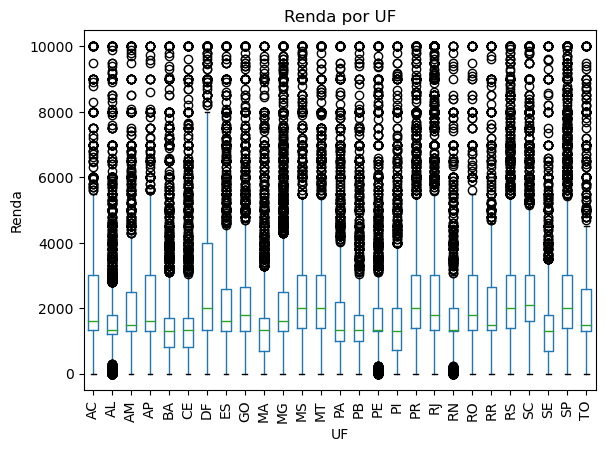

<Figure size 1000x600 with 0 Axes>

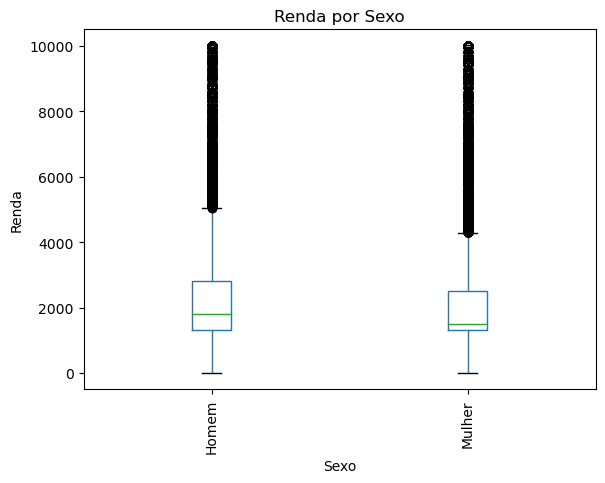

<Figure size 1000x600 with 0 Axes>

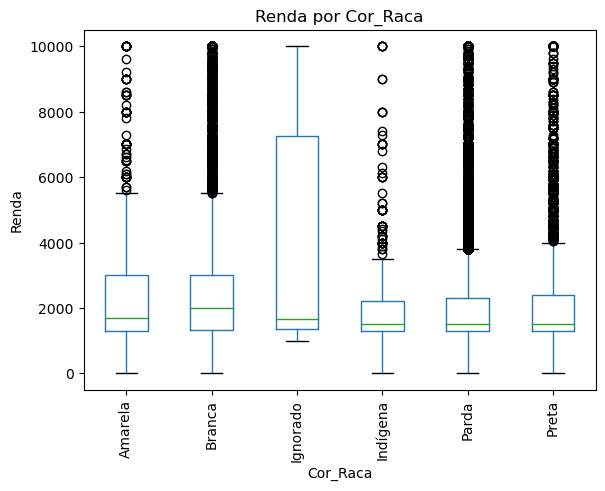

<Figure size 1000x600 with 0 Axes>

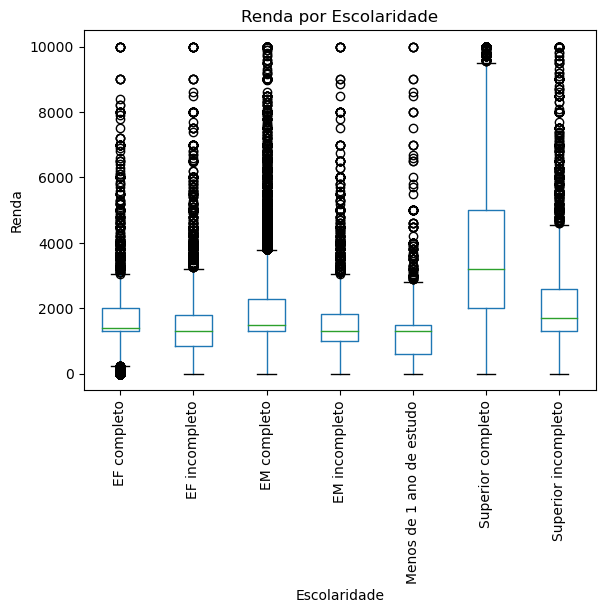

<Figure size 1000x600 with 0 Axes>

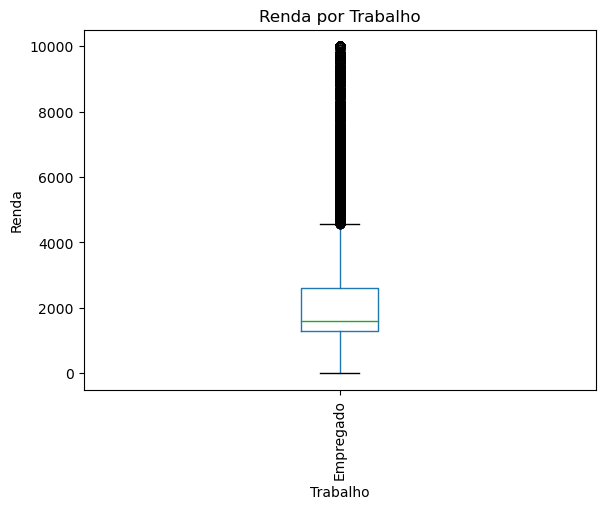

<Figure size 1000x600 with 0 Axes>

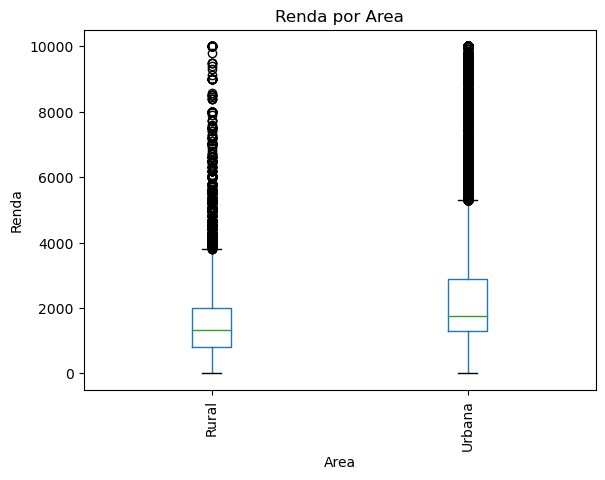

In [32]:
# Definição da função auxiliar para boxplots com limitação de faixa de renda
def boxplot_renda_por_variavel(df, variavel, limite):
    plt.figure(figsize=(10,6))

    # Filtra os dados para excluir valores acima do limite superior
    df_filtrado = df[df.Renda <= limite]

    df_filtrado.boxplot(column='Renda', by=variavel, grid=False)
    plt.title(f'Renda por {variavel}')
    plt.suptitle('')
    plt.xlabel(variavel)
    plt.xticks(rotation=90)  # Rotacionar rótulos para melhor visualização
    plt.ylabel('Renda')
    plt.show()

# Encontrando o limite superior baseado em um percentil da renda
limite_97 = dados_small.Renda.quantile(0.97)

# Chamar a função para cada variável categórica com o limite superior definido
variaveis = ['UF','Sexo', 'Cor_Raca', 'Escolaridade', 'Trabalho', 'Area']
for variavel in variaveis:
    boxplot_renda_por_variavel(dados_small, variavel, limite_97)

In [33]:
dados_small.describe()

,Ano,Trimestre,Idade,Renda
count,132342.0,132342.0,132342.000000,132127.000000
mean,2023.0,2.0,38.663773,2686.639128
std,0.0,0.0,12.866795,3835.545905
min,2023.0,2.0,14.000000,0.000000
25%,2023.0,2.0,28.000000,1302.000000
50%,2023.0,2.0,38.000000,1700.000000
75%,2023.0,2.0,48.000000,2849.000000
max,2023.0,2.0,103.000000,300000.000000


In [34]:
dados_small.isnull().sum()

Ano               0
Trimestre         0
UF                0
Area              0
Sexo              0
Idade             0
Cor_Raca          0
Escolaridade      0
Ocupacao          0
Trabalho          0
Renda           215
dtype: int64

In [35]:
dummies_UF = pd.get_dummies(dados_small['UF'],drop_first=True,dtype='int64')
dummies_UF

,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132337,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132338,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132339,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132340,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
dummies_Sexo = pd.get_dummies(dados_small['Sexo'],drop_first=True,dtype='int64')

In [37]:
dummies_Cor_Raca = pd.get_dummies(dados_small['Cor_Raca'],drop_first=True,dtype='int64')

In [38]:
dummies_Escolaridade = pd.get_dummies(dados_small['Escolaridade'],drop_first=True,dtype='int64')

In [39]:
dummies_Area = pd.get_dummies(dados_small['Area'],drop_first=True,dtype='int64')

In [40]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [41]:
dados_small_dummies = pd.concat([dados_small, dummies_UF, dummies_Sexo, dummies_Cor_Raca, dummies_Escolaridade, dummies_Area], axis=1)
dados_small_dummies.columns

Index(['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana'],
      dtype='object')

In [42]:
df = dados_small_dummies[['Ano', 'Trimestre', 'UF', 'Area', 'Sexo', 'Idade', 'Cor_Raca',
       'Escolaridade', 'Ocupacao', 'Trabalho', 'Renda', 'AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]

df.describe()

,Ano,Trimestre,Idade,Renda,AL,AM,AP,BA,CE,DF,...,Indígena,Parda,Preta,EF incompleto,EM completo,EM incompleto,Menos de 1 ano de estudo,Superior completo,Superior incompleto,Urbana
count,132342.0,132342.0,132342.000000,132127.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,...,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000,132342.000000
mean,2023.0,2.0,38.663773,2686.639128,0.034063,0.022321,0.008357,0.040682,0.039345,0.025117,...,0.004466,0.471113,0.114076,0.180721,0.357264,0.068376,0.022525,0.236720,0.066064,0.824153
std,0.0,0.0,12.866795,3835.545905,0.181392,0.147726,0.091035,0.197554,0.194415,0.156480,...,0.066677,0.499167,0.317904,0.384788,0.479195,0.252391,0.148384,0.425071,0.248394,0.380692
min,2023.0,2.0,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,2.0,28.000000,1302.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2023.0,2.0,38.000000,1700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023.0,2.0,48.000000,2849.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2023.0,2.0,103.000000,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df.isnull().sum()
df = df.dropna()

In [44]:
X = df[['AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
       'Branca', 'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     916.2
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:28:05   Log-Likelihood:            -1.2620e+06
No. Observations:              132127   AIC:                         2.524e+06
Df Residuals:                  132087   BIC:                         2.524e+06
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1868.0782    147.174     12.693      0.000    1579.620    2156.536
AL                        -310.1374     92.155     -3.365      0.001    -490.760    -129.515
AM                        -159.8159     99.241     -1.610      0.107    -354.326      34.694
AP                          34.7950    128.014      0.272      0.786    -216.110     285.700
BA                        -236.7916     90.081     -2.629      0.009    -413.348     -60.235
CE                        -375.7208     90.245     -4.163      0.000    -552.600    -198.842
DF                        1714.3043     97.095     17.656      0.000    1524.000    1904.608
ES                         202.1372     90.407      2.236      0.025      24.941     379.333
GO                         280.6837     90.217      3.111      0.002     103.861     457.507
MA                        -442.0586     88.891     -4.973      0.000    -616.284    -267.833
MG                         198.2876     83.607      2.372      0.018      34.420     362.156
MS                         434.8376     95.646      4.546      0.000     247.373     622.302
MT                         764.6644     93.327      8.193      0.000     581.745     947.583
PA                          78.0606     93.421      0.836      0.403    -105.044     261.165
PB                         -82.8411    100.062     -0.828      0.408    -278.962     113.279
PE                        -237.9867     93.702     -2.540      0.011    -421.640     -54.333
PI                        -243.7585    102.925     -2.368      0.018    -445.489     -42.028
PR                         308.7167     86.140      3.584      0.000     139.884     477.550
RJ                         693.1020     84.319      8.220      0.000     527.839     858.365
RN                        -260.2495    104.677     -2.486      0.013    -465.414     -55.085
RO                         235.7080    111.208      2.120      0.034      17.743     453.673
RR                         232.8259    114.935      2.026      0.043       7.556     458.096
RS                         451.7022     87.128      5.184      0.000     280.933     622.471
SC                         367.7913     84.933      4.330      0.000     201.323     534.259
SE                        -185.8092    105.239     -1.766      0.077    -392.076      20.458
SP                         520.9441     83.008      6.276      0.000     358.250     683.638
TO                          54.5239    104.551      0.522      0.602    -150.394     259.442
Mulher                   -1083.5965     19.165    -56.541      0.000   -1121.159   -1046.034
Branca                       5.4172    120.198      0.045      0.964    -230.168     241.003
Ignorado                  3717.7515    989.853      3.756      0.000    1777.658    5657.845
Indígena      

In [45]:
X = df[['Mulher','AL', 'AM', 'AP', 'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results1 = regress(Y,X)
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     940.3
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:32:28   Log-Likelihood:            -1.2620e+06
No. Observations:              132127   AIC:                         2.524e+06
Df Residuals:                  132088   BIC:                         2.524e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1874.4607     89.039     21.052      0.000    1699.945    2048.976
Mulher                    2.395e+15   3.41e+15      0.703      0.482   -4.29e+15    9.08e+15
AL                        -310.8411     92.158     -3.373      0.001    -491.469    -130.213
AM                        -177.0813    102.249     -1.732      0.083    -377.487      23.324
AP                          77.2005    141.524      0.545      0.585    -200.183     354.584
BA                        -234.9710     90.115     -2.607      0.009    -411.594     -58.348
CE                        -395.1252     94.389     -4.186      0.000    -580.127    -210.124
DF                        1712.2030     97.139     17.626      0.000    1521.813    1902.593
ES                         202.3970     90.396      2.239      0.025      25.222     379.572
GO                         280.9386     90.214      3.114      0.002     104.120     457.757
MA                        -442.3984     88.892     -4.977      0.000    -616.626    -268.171
MG                         198.4547     83.595      2.374      0.018      34.611     362.299
MS                         434.4165     95.647      4.542      0.000     246.951     621.882
MT                         764.1588     93.327      8.188      0.000     581.240     947.077
PA                          78.2783     93.418      0.838      0.402    -104.818     261.375
PB                         -83.0347    100.061     -0.830      0.407    -279.152     113.082
PE                        -238.1000     93.698     -2.541      0.011    -421.747     -54.453
PI                        -243.6229    102.918     -2.367      0.018    -445.341     -41.905
PR                         308.8639     86.129      3.586      0.000     140.053     477.675
RJ                         693.2638     84.312      8.223      0.000     528.014     858.513
RN                        -259.5478    104.668     -2.480      0.013    -464.696     -54.400
RO                         235.3439    111.204      2.116      0.034      17.386     453.302
RR                         232.7652    114.932      2.025      0.043       7.501     458.029
RS                         452.0741     87.096      5.191      0.000     281.367     622.781
SC                         368.0534     84.908      4.335      0.000     201.636     534.471
SE                        -186.2501    105.240     -1.770      0.077    -392.519      20.019
SP                         520.9977     83.007      6.277      0.000     358.306     683.690
TO                          54.0514    104.553      0.517      0.605    -150.870     258.973
Mulher                   -2.395e+15   3.41e+15     -0.703      0.482   -9.08e+15    4.29e+15
Ignorado                  3713.2014    982.787      3.778      0.000    1786.957    5639.446
Indígena      

In [46]:
X = df[['Mulher','AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO', 'Mulher',
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results2 = regress(Y,X)
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     965.7
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:32:43   Log-Likelihood:            -1.2620e+06
No. Observations:              132127   AIC:                         2.524e+06
Df Residuals:                  132089   BIC:                         2.524e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1885.8050     76.359     24.697      0.000    1736.143    2035.467
Mulher                    -541.8097      9.582    -56.543      0.000    -560.591    -523.029
AL                        -322.6375     79.794     -4.043      0.000    -479.032    -166.243
AM                        -172.3229     87.854     -1.961      0.050    -344.514      -0.132
BA                        -249.3001     77.381     -3.222      0.001    -400.966     -97.634
CE                        -388.2202     77.577     -5.004      0.000    -540.269    -236.172
DF                        1701.7741     85.376     19.933      0.000    1534.439    1869.109
ES                         189.6501     77.722      2.440      0.015      37.317     341.983
GO                         268.1709     77.524      3.459      0.001     116.225     420.117
MA                        -454.5728     76.020     -5.980      0.000    -603.570    -305.576
MG                         185.8102     69.716      2.665      0.008      49.168     322.452
MS                         422.3183     83.781      5.041      0.000     258.109     586.527
MT                         752.1506     81.111      9.273      0.000     593.175     911.127
PA                          65.5643     81.247      0.807      0.420     -93.679     224.807
PB                         -95.3457     88.807     -1.074      0.283    -269.406      78.714
PE                        -250.4876     81.565     -3.071      0.002    -410.353     -90.623
PI                        -256.2417     92.017     -2.785      0.005    -436.593     -75.890
PR                         296.2353     72.729      4.073      0.000     153.688     438.783
RJ                         680.5849     70.515      9.652      0.000     542.377     818.793
RN                        -272.7175     93.956     -2.903      0.004    -456.869     -88.566
RO                         223.2147    101.185      2.206      0.027      24.894     421.536
RR                         220.3165    105.259      2.093      0.036      14.011     426.622
RS                         439.2593     73.860      5.947      0.000     294.495     584.024
SC                         355.3387     71.273      4.986      0.000     215.645     495.033
SE                        -198.3185     94.608     -2.096      0.036    -383.748     -12.888
SP                         508.4138     68.992      7.369      0.000     373.192     643.636
TO                          41.9976     93.821      0.448      0.654    -141.890     225.885
Mulher                    -541.8097      9.582    -56.543      0.000    -560.591    -523.029
Ignorado                  3712.3944    982.779      3.777      0.000    1786.165    5638.624
Indígena                  -528.9381    141.488     -3.738      0.000    -806.252    -251.624
Parda         

In [47]:
X = df[['Mulher','AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP',  'Mulher',
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results3 = regress(Y,X)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     992.5
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:33:02   Log-Likelihood:            -1.2620e+06
No. Observations:              132127   AIC:                         2.524e+06
Df Residuals:                  132090   BIC:                         2.524e+06
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1904.1941     64.367     29.584      0.000    1778.037    2030.351
Mulher                    -541.8195      9.582    -56.545      0.000    -560.600    -523.039
AL                        -340.7093     68.827     -4.950      0.000    -475.609    -205.810
AM                        -190.3264     78.107     -2.437      0.015    -343.414     -37.239
BA                        -267.4183     65.951     -4.055      0.000    -396.682    -138.155
CE                        -406.2769     66.264     -6.131      0.000    -536.153    -276.400
DF                        1683.7561     75.292     22.363      0.000    1536.186    1831.326
ES                         171.5838     66.421      2.583      0.010      41.400     301.768
GO                         250.1082     66.194      3.778      0.000     120.368     379.848
MA                        -472.6725     64.374     -7.343      0.000    -598.845    -346.500
MG                         167.7243     56.814      2.952      0.003      56.370     279.079
MS                         404.2524     73.419      5.506      0.000     260.352     548.153
MT                         734.0901     70.364     10.433      0.000     596.178     872.003
PA                          47.4921     70.506      0.674      0.501     -90.699     185.683
PB                        -113.4160     79.101     -1.434      0.152    -268.453      41.621
PE                        -268.5499     70.884     -3.789      0.000    -407.482    -129.618
PI                        -274.3168     82.684     -3.318      0.001    -436.375    -112.258
PR                         278.1594     60.489      4.599      0.000     159.603     396.716
RJ                         662.5303     57.841     11.454      0.000     549.163     775.898
RN                        -290.7861     84.843     -3.427      0.001    -457.076    -124.496
RO                         205.1577     92.796      2.211      0.027      23.279     387.037
RR                         202.2884     97.249      2.080      0.038      11.682     392.895
RS                         421.1574     61.806      6.814      0.000     300.019     542.296
SC                         337.2504     58.711      5.744      0.000     222.178     452.323
SE                        -216.4170     85.533     -2.530      0.011    -384.061     -48.773
SP                         490.3423     55.946      8.765      0.000     380.688     599.996
Mulher                    -541.8195      9.582    -56.545      0.000    -560.600    -523.039
Ignorado                  3712.4568    982.776      3.778      0.000    1786.233    5638.680
Indígena                  -528.9886    141.487     -3.739      0.000    -806.301    -251.676
Parda                     -522.3365     21.970    -23.775      0.000    -565.397    -479.276
Preta         

In [48]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 'Menos de 1 ano de estudo',
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results4 = regress(Y,X)
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     907.6
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:33:23   Log-Likelihood:            -1.2636e+06
No. Observations:              132127   AIC:                         2.527e+06
Df Residuals:                  132091   BIC:                         2.528e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1555.4667     64.841     23.989      0.000    1428.380    1682.554
AL                        -346.5359     69.655     -4.975      0.000    -483.058    -210.014
AM                        -161.1811     79.044     -2.039      0.041    -316.106      -6.256
BA                        -278.6660     66.744     -4.175      0.000    -409.483    -147.849
CE                        -409.4326     67.061     -6.105      0.000    -540.871    -277.994
DF                        1684.5226     76.197     22.107      0.000    1535.178    1833.867
ES                         163.1748     67.220      2.427      0.015      31.425     294.924
GO                         254.9351     66.990      3.806      0.000     123.635     386.235
MA                        -475.2801     65.148     -7.295      0.000    -602.970    -347.591
MG                         145.8028     57.496      2.536      0.011      33.112     258.494
MS                         405.2959     74.302      5.455      0.000     259.665     550.927
MT                         741.0893     71.210     10.407      0.000     601.518     880.660
PA                          69.0809     71.353      0.968      0.333     -70.770     208.932
PB                        -126.6448     80.052     -1.582      0.114    -283.546      30.256
PE                        -274.3326     71.737     -3.824      0.000    -414.935    -133.730
PI                        -277.5384     83.678     -3.317      0.001    -441.546    -113.531
PR                         269.1455     61.216      4.397      0.000     149.163     389.128
RJ                         665.9276     58.537     11.376      0.000     551.197     780.658
RN                        -289.4009     85.863     -3.370      0.001    -457.691    -121.111
RO                         185.8873     93.912      1.979      0.048       1.822     369.953
RR                         217.0283     98.418      2.205      0.027      24.130     409.926
RS                         385.0051     62.546      6.156      0.000     262.416     507.594
SC                         312.2018     59.415      5.255      0.000     195.749     428.655
SE                        -205.4336     86.562     -2.373      0.018    -375.093     -35.774
SP                         475.3911     56.619      8.396      0.000     364.420     586.362
Ignorado                  3808.7269    994.594      3.829      0.000    1859.341    5758.113
Indígena                  -556.8525    143.188     -3.889      0.000    -837.499    -276.206
Parda                     -516.5192     22.234    -23.231      0.000    -560.097    -472.941
Preta                     -592.6616     32.883    -18.023      0.000    -657.111    -528.212
EF incompleto              -65.4404     42.706     -1.532      0.125    -149.144      18.263
EM completo   

In [49]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results5 = regress(Y,X)
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     934.3
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:33:37   Log-Likelihood:            -1.2636e+06
No. Observations:              132127   AIC:                         2.527e+06
Df Residuals:                  132092   BIC:                         2.528e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1551.8608     61.735     25.138      0.000    1430.862    1672.860
AL                   -346.6159     69.653     -4.976      0.000    -483.134    -210.097
AM                   -161.0397     79.040     -2.037      0.042    -315.957      -6.123
BA                   -278.8100     66.739     -4.178      0.000    -409.618    -148.002
CE                   -409.4797     67.060     -6.106      0.000    -540.917    -278.043
DF                   1684.6819     76.192     22.111      0.000    1535.348    1834.016
ES                    163.3287     67.214      2.430      0.015      31.590     295.067
GO                    255.0766     66.986      3.808      0.000     123.786     386.367
MA                   -475.2647     65.148     -7.295      0.000    -602.954    -347.576
MG                    146.0222     57.483      2.540      0.011      33.356     258.688
MS                    405.4791     74.295      5.458      0.000     259.862     551.096
MT                    741.1977     71.208     10.409      0.000     601.632     880.763
PA                     69.2236     71.349      0.970      0.332     -70.618     209.066
PB                   -126.7444     80.050     -1.583      0.113    -283.641      30.153
PE                   -274.3473     71.736     -3.824      0.000    -414.949    -133.745
PI                   -277.4619     83.677     -3.316      0.001    -441.467    -113.457
PR                    269.3251     61.208      4.400      0.000     149.359     389.291
RJ                    666.0983     58.529     11.381      0.000     551.383     780.814
RN                   -289.3242     85.862     -3.370      0.001    -457.612    -121.037
RO                    185.9837     93.910      1.980      0.048       1.922     370.045
RR                    217.1159     98.417      2.206      0.027      24.221     410.011
RS                    385.3616     62.515      6.164      0.000     262.833     507.890
SC                    312.4780     59.396      5.261      0.000     196.063     428.893
SE                   -205.4845     86.561     -2.374      0.018    -375.142     -35.827
SP                    475.5903     56.608      8.402      0.000     364.640     586.541
Ignorado             3807.0154    994.546      3.828      0.000    1857.723    5756.307
Indígena             -556.9385    143.187     -3.890      0.000    -837.582    -276.295
Parda                -516.5349     22.234    -23.232      0.000    -560.113    -472.957
Preta                -592.7763     32.877    -18.030      0.000    -657.214    -528.339
EF incompleto         -62.1199     38.606     -1.609      0.108    -137.787      13.547
EM completo           303.6488     35.438      8.568      0.000     234.190     373.107
EM incompleto        -106.9229     48.031     -2.226      0.026    -201.064     -12.782
Sup

In [50]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',  'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 'EF incompleto',
       'EM completo', 'EM incompleto', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results6 = regress(Y,X)
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     962.6
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:33:57   Log-Likelihood:            -1.2636e+06
No. Observations:              132127   AIC:                         2.527e+06
Df Residuals:                  132093   BIC:                         2.528e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1582.2423     53.204     29.739      0.000    1477.964    1686.520
AL                   -376.7237     62.358     -6.041      0.000    -498.945    -254.503
AM                   -190.9986     72.759     -2.625      0.009    -333.605     -48.393
BA                   -308.9786     59.053     -5.232      0.000    -424.721    -193.236
CE                   -439.5641     59.461     -7.392      0.000    -556.106    -323.022
DF                   1654.8092     69.693     23.744      0.000    1518.212    1791.407
ES                    133.2936     59.661      2.234      0.025      16.360     250.227
GO                    225.0142     59.388      3.789      0.000     108.614     341.415
MA                   -505.4282     57.251     -8.828      0.000    -617.640    -393.217
MG                    115.9336     48.400      2.395      0.017      21.071     210.797
MS                    375.4373     67.535      5.559      0.000     243.069     507.805
MT                    711.1526     64.121     11.091      0.000     585.476     836.829
PB                   -156.8429     73.795     -2.125      0.034    -301.479     -12.207
PE                   -304.4224     64.693     -4.706      0.000    -431.220    -177.625
PI                   -307.5621     77.713     -3.958      0.000    -459.878    -155.246
PR                    239.2831     52.798      4.532      0.000     135.801     342.766
RJ                    636.1435     49.723     12.794      0.000     538.687     733.600
RN                   -319.4047     80.069     -3.989      0.000    -476.338    -162.471
RO                    155.9250     88.652      1.759      0.079     -17.832     329.682
RR                    187.1348     93.440      2.003      0.045       3.995     370.275
RS                    355.3176     54.307      6.543      0.000     248.878     461.758
SC                    282.4458     50.692      5.572      0.000     183.090     381.802
SE                   -235.6383     80.789     -2.917      0.004    -393.983     -77.293
SP                    445.5698     47.403      9.400      0.000     352.661     538.478
Ignorado             3807.2291    994.546      3.828      0.000    1857.938    5756.520
Indígena             -557.5980    143.185     -3.894      0.000    -838.238    -276.958
Parda                -516.5568     22.234    -23.233      0.000    -560.134    -472.979
Preta                -592.7854     32.877    -18.031      0.000    -657.223    -528.348
EF incompleto         -61.7093     38.604     -1.599      0.110    -137.372      13.953
EM completo           303.8137     35.438      8.573      0.000     234.356     373.271
EM incompleto        -106.5343     48.030     -2.218      0.027    -200.672     -12.397
Superior completo    3647.5386     37.722     96.694      0.000    3573.603    3721.474
Sup

In [51]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',  'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 
       'EM completo', 'EM incompleto', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results7 = regress(Y,X)
results7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     992.5
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:34:12   Log-Likelihood:            -1.2636e+06
No. Observations:              132127   AIC:                         2.527e+06
Df Residuals:                  132094   BIC:                         2.528e+06
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1540.3202     46.291     33.275      0.000    1449.590    1631.050
AL                   -376.9129     62.358     -6.044      0.000    -499.134    -254.691
AM                   -191.1580     72.759     -2.627      0.009    -333.765     -48.551
BA                   -309.1572     59.053     -5.235      0.000    -424.900    -193.414
CE                   -439.2901     59.461     -7.388      0.000    -555.832    -322.748
DF                   1654.3403     69.693     23.737      0.000    1517.743    1790.938
ES                    132.5265     59.659      2.221      0.026      15.596     249.457
GO                    224.4288     59.388      3.779      0.000     108.030     340.828
MA                   -504.5528     57.249     -8.813      0.000    -616.760    -392.346
MG                    114.9853     48.397      2.376      0.018      20.129     209.842
MS                    374.1916     67.531      5.541      0.000     241.832     506.551
MT                    711.3891     64.121     11.094      0.000     585.712     837.066
PB                   -157.5622     73.794     -2.135      0.033    -302.196     -12.928
PE                   -305.1998     64.692     -4.718      0.000    -431.994    -178.405
PI                   -308.0776     77.713     -3.964      0.000    -460.393    -155.762
PR                    239.3272     52.798      4.533      0.000     135.844     342.810
RJ                    636.1628     49.723     12.794      0.000     538.706     733.620
RN                   -319.8033     80.069     -3.994      0.000    -476.737    -162.870
RO                    155.9908     88.653      1.760      0.078     -17.767     329.748
RR                    187.4500     93.440      2.006      0.045       4.309     370.591
RS                    355.3761     54.307      6.544      0.000     248.936     461.817
SC                    283.5617     50.688      5.594      0.000     184.215     382.909
SE                   -237.2775     80.783     -2.937      0.003    -395.611     -78.944
SP                    445.4485     47.403      9.397      0.000     352.540     538.357
Ignorado             3813.7734    994.543      3.835      0.000    1864.487    5763.060
Indígena             -557.9582    143.186     -3.897      0.000    -838.600    -277.317
Parda                -516.8266     22.233    -23.246      0.000    -560.403    -473.250
Preta                -593.0615     32.876    -18.039      0.000    -657.499    -528.624
EM completo           344.5039     24.656     13.972      0.000     296.179     392.829
EM incompleto         -65.7049     40.675     -1.615      0.106    -145.428      14.018
Superior completo    3688.0575     27.937    132.012      0.000    3633.301    3742.814
Superior incompleto   578.3412     41.884     13.808      0.000     496.248     660.434
Urb

In [52]:
X = df[['AL', 'AM',  'BA',
       'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT',  'PB', 'PE', 'PI',
       'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 
        'Ignorado', 'Indígena', 'Parda', 'Preta', 
       'EM completo', 
       'Superior completo', 'Superior incompleto', 'Urbana']]
Y = df['Renda']

results8 = regress(Y,X)
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1024.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:34:33   Log-Likelihood:            -1.2636e+06
No. Observations:              132127   AIC:                         2.527e+06
Df Residuals:                  132095   BIC:                         2.528e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1528.9404     45.752     33.418      0.000    1439.267    1618.614
AL                   -375.9873     62.356     -6.030      0.000    -498.204    -253.770
AM                   -191.4254     72.759     -2.631      0.009    -334.033     -48.818
BA                   -308.7979     59.053     -5.229      0.000    -424.541    -193.055
CE                   -438.8960     59.461     -7.381      0.000    -555.438    -322.354
DF                   1654.4130     69.694     23.738      0.000    1517.815    1791.011
ES                    132.7507     59.659      2.225      0.026      15.820     249.682
GO                    224.0780     59.388      3.773      0.000     107.679     340.477
MA                   -504.1703     57.249     -8.807      0.000    -616.377    -391.964
MG                    115.1872     48.397      2.380      0.017      20.331     210.044
MS                    374.3147     67.531      5.543      0.000     241.954     506.675
MT                    709.7544     64.114     11.070      0.000     584.092     835.416
PB                   -156.5286     73.791     -2.121      0.034    -301.158     -11.899
PE                   -304.1264     64.689     -4.701      0.000    -430.915    -177.338
PI                   -307.3151     77.712     -3.955      0.000    -459.629    -155.002
PR                    239.3414     52.798      4.533      0.000     135.858     342.825
RJ                    636.4940     49.723     12.801      0.000     539.037     733.951
RN                   -319.3437     80.069     -3.988      0.000    -476.277    -162.410
RO                    154.6921     88.650      1.745      0.081     -19.060     328.444
RR                    186.1136     93.437      1.992      0.046       2.979     369.248
RS                    354.8824     54.306      6.535      0.000     248.443     461.322
SC                    283.5419     50.688      5.594      0.000     184.194     382.890
SE                   -236.6653     80.783     -2.930      0.003    -394.998     -78.333
SP                    445.3800     47.403      9.396      0.000     352.471     538.289
Ignorado             3812.3483    994.549      3.833      0.000    1863.051    5761.646
Indígena             -557.4706    143.186     -3.893      0.000    -838.113    -276.828
Parda                -516.7182     22.233    -23.241      0.000    -560.295    -473.141
Preta                -592.8982     32.876    -18.034      0.000    -657.335    -528.461
EM completo           358.1940     23.154     15.470      0.000     312.813     403.575
Superior completo    3702.0019     26.570    139.328      0.000    3649.924    3754.079
Superior incompleto   592.2837     40.986     14.451      0.000     511.952     672.615
Urbana                331.4668     26.119     12.691      0.000     280.275     382.659
===

In [53]:
results_final = results8
results_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     1024.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        09:34:48   Log-Likelihood:            -1.2636e+06
No. Observations:              132127   AIC:                         2.527e+06
Df Residuals:                  132095   BIC:                         2.528e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1528.9404     45.752     33.418      0.000    1439.267    1618.614
AL                   -375.9873     62.356     -6.030      0.000    -498.204    -253.770
AM                   -191.4254     72.759     -2.631      0.009    -334.033     -48.818
BA                   -308.7979     59.053     -5.229      0.000    -424.541    -193.055
CE                   -438.8960     59.461     -7.381      0.000    -555.438    -322.354
DF                   1654.4130     69.694     23.738      0.000    1517.815    1791.011
ES                    132.7507     59.659      2.225      0.026      15.820     249.682
GO                    224.0780     59.388      3.773      0.000     107.679     340.477
MA                   -504.1703     57.249     -8.807      0.000    -616.377    -391.964
MG                    115.1872     48.397      2.380      0.017      20.331     210.044
MS                    374.3147     67.531      5.543      0.000     241.954     506.675
MT                    709.7544     64.114     11.070      0.000     584.092     835.416
PB                   -156.5286     73.791     -2.121      0.034    -301.158     -11.899
PE                   -304.1264     64.689     -4.701      0.000    -430.915    -177.338
PI                   -307.3151     77.712     -3.955      0.000    -459.629    -155.002
PR                    239.3414     52.798      4.533      0.000     135.858     342.825
RJ                    636.4940     49.723     12.801      0.000     539.037     733.951
RN                   -319.3437     80.069     -3.988      0.000    -476.277    -162.410
RO                    154.6921     88.650      1.745      0.081     -19.060     328.444
RR                    186.1136     93.437      1.992      0.046       2.979     369.248
RS                    354.8824     54.306      6.535      0.000     248.443     461.322
SC                    283.5419     50.688      5.594      0.000     184.194     382.890
SE                   -236.6653     80.783     -2.930      0.003    -394.998     -78.333
SP                    445.3800     47.403      9.396      0.000     352.471     538.289
Ignorado             3812.3483    994.549      3.833      0.000    1863.051    5761.646
Indígena             -557.4706    143.186     -3.893      0.000    -838.113    -276.828
Parda                -516.7182     22.233    -23.241      0.000    -560.295    -473.141
Preta                -592.8982     32.876    -18.034      0.000    -657.335    -528.461
EM completo           358.1940     23.154     15.470      0.000     312.813     403.575
Superior completo    3702.0019     26.570    139.328      0.000    3649.924    3754.079
Superior incompleto   592.2837     40.986     14.451      0.000     511.952     672.615
Urbana                331.4668     26.119     12.691      0.000     280.275     382.659
===